In [3]:
import pandas as pd
import numpy as np
from skbio.stats.composition import clr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
file_path = r"C:\Users\ccz\Desktop\Galaxy2235-[PICRUSt2 Full pipeline on data 2226 and data 2231_ Pathway abundances].tabular.txt"
pathway = pd.read_csv(file_path, sep="\t",  index_col=0, comment="#").T


pathway

pathway,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY,ANAGLYCOLYSIS-PWY,ARG+POLYAMINE-SYN,ARGDEG-PWY,ARGORNPROST-PWY,ARGSYN-PWY,...,THISYN-PWY,THREOCAT-PWY,THRESYN-PWY,TRNA-CHARGING-PWY,TRPSYN-PWY,TYRFUMCAT-PWY,UBISYN-PWY,UDPNAGSYN-PWY,VALDEG-PWY,VALSYN-PWY
SRR29318373,56152.733683,2.263657,0.000000,871.478212,59686.455729,66769.722284,17320.320673,0.000000,12925.086294,36407.205452,...,28256.934933,0.000000,62302.131135,66211.030079,46647.861104,472.514955,14715.443612,55762.825735,8.006864,57826.137155
SRR29318374,37878.299452,20.287486,0.355945,1136.945128,40298.576163,47676.076552,11160.613563,3.993970,12273.396118,33341.949840,...,27902.503826,0.000000,52965.305755,48832.974496,34390.554464,1160.239626,3915.821173,38761.286524,16.984276,46838.034814
SRR29318375,44986.407755,0.000000,0.000000,1207.406973,42680.895092,53429.377201,7564.200150,0.000000,10367.485235,23525.967899,...,33101.407913,12.780288,42989.078360,51238.908592,33999.606692,110.124130,7504.471135,31509.338709,3.987979,36049.887959
SRR29318376,34600.926412,1.330963,0.000000,69.922086,48762.791214,46896.525613,5498.104990,0.000000,1537.472776,25187.398866,...,15258.387604,12.410765,40538.743769,43727.657045,26630.098571,27.946090,1434.254949,36907.486059,0.000000,34698.211626
SRR29318377,7150.684575,81.533280,1.894737,581.434602,17774.765279,21894.324210,1139.720535,37.022057,1624.735232,19903.784948,...,1625.328437,162.381331,21060.620258,20443.348354,2155.552842,151.312116,518.769546,25092.768438,51.361937,2782.750420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR29318472,38019.077673,3.893584,0.430000,10.807919,43876.428455,46649.929894,8570.653237,0.000000,660.125793,17558.332672,...,19180.683382,2.774927,42399.077558,45845.535682,20801.270985,20.853569,127.781984,28694.970941,0.000000,25612.901757
SRR29318473,49055.867915,47.821391,0.000000,1844.850800,58458.806555,62712.495011,9705.981465,27.332062,7308.711519,46589.710605,...,22859.320613,16.088002,54989.291154,56492.752574,37495.695129,285.355194,2646.861413,48187.173290,96.665516,58515.993730
SRR29318474,37409.315116,1.962049,0.723626,176.320071,57700.210208,61702.153655,8270.086812,2.342637,14776.974392,39460.988074,...,25668.520279,0.000000,61434.112567,56001.903520,40799.056320,21.320893,66.962974,35874.914608,5.984139,57435.264464
SRR29318475,40224.719567,62.503151,0.000000,311.188665,54900.496095,57326.075367,13751.965956,0.000000,17172.351419,40024.380225,...,25653.692174,35.016406,55742.559609,51816.664991,35651.443053,137.907140,436.743765,43397.639378,58.733621,53802.934056


In [7]:
data_path = r"C:\Users\ccz\Documents\pulpitis_ml\data\metadata2.csv"
metadata = pd.read_csv(data_path)
metadata

,sample,Group,Pulp exposure status,Age,Sex,Cold pulp test,Heat pulp test,Spontaneous pain,Night pain,Percussion pain,Electronic pulp test,toothsite
0,SRR29318436,AIP,Exposed,54,male,normal/sensitive,normal/sensitive,no,no,no,normal,Molar
1,SRR29318435,AIP,Exposed,22,male,normal/sensitive,normal/sensitive,no,no,no,normal,Molar
2,SRR29318420,AIP,Exposed,23,male,normal/sensitive,normal/sensitive,no,no,no,abnormal,Molar
3,SRR29318409,AIP,Exposed,30,male,normal/sensitive,normal/sensitive,no,no,no,abnormal,Molar
4,SRR29318398,AIP,Exposed,24,male,sensitive with lingering pain(＜30s),sensitive with lingering pain(＜30s),no,no,no,normal,Premolar
...,...,...,...,...,...,...,...,...,...,...,...,...
99,SRR29318376,SIP,Exposed,28,female,sensitive with lingering pain(＞30s),sensitive with lingering pain(＞30s),yes,yes,yes,abnormal,Molar
100,SRR29318433,SIP,Exposed,55,female,sensitive with lingering pain(＜30s),sensitive with lingering pain(＜30s),yes,yes,no,normal,Molar
101,SRR29318432,SIP,Exposed,36,male,sensitive with lingering pain(＜30s),sensitive with lingering pain(＜30s),yes,yes,no,normal,Premolar
102,SRR29318431,SIP,Exposed,22,female,sensitive with lingering pain(＜30s),sensitive with lingering pain(＜30s),yes,yes,no,normal,Molar


In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming your dataframe is called 'metadata'
# Replace these with the actual text columns you want to use
selected_columns = [ 'Sex', 'Spontaneous pain ', 'Heat pulp test' ]  # Change these to your actual column names

# Step 1: Select only the columns you want to use
X = metadata[selected_columns]
y = metadata['Group']

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 4: Create preprocessing for text columns
# We'll treat each selected column as a text feature
preprocessor = ColumnTransformer(
    transformers=[
        ('text1', TfidfVectorizer(max_features=1000, stop_words='english'), selected_columns[0]),
        ('text2', TfidfVectorizer(max_features=1000, stop_words='english'), selected_columns[1]),
        ('text3', TfidfVectorizer(max_features=1000, stop_words='english'), selected_columns[2]),
    ]
)

# Step 5: Create pipeline with preprocessing and Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'  # Handles class imbalance if any
    ))
])

# Step 6: Train the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Get feature importance (this is more complex with multiple text columns)
# You can access the classifier from the pipeline
classifier = pipeline.named_steps['classifier']
print(f"\nNumber of features used: {classifier.n_features_in_}")

Accuracy: 0.6190

Classification Report:
              precision    recall  f1-score   support

         AIP       0.00      0.00      0.00         5
          NP       0.45      1.00      0.62         5
          RP       0.50      0.40      0.44         5
         SIP       1.00      1.00      1.00         6

    accuracy                           0.62        21
   macro avg       0.49      0.60      0.52        21
weighted avg       0.51      0.62      0.54        21


Number of features used: 8


C:\Users\ccz\.conda\envs\microbiome\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ccz\.conda\envs\microbiome\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ccz\.conda\envs\microbiome\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [159]:
# Cell 1 — Imports and basic settings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# plotting defaults
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (8, 5)

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)


In [147]:
# Cell 2 — Load your data
# Edit these two variables to match your files.
# - feature_table_path: CSV/TSV where rows = samples and columns = features (functions).
# - labels_path: file (CSV/TSV) containing sample IDs and the label (4-class pulpitis).
#
# Alternatively, if your feature table already contains a 'label' column, set labels_path = None
#
feature_table_path = r"C:\Users\ccz\Desktop\Galaxy2235-[PICRUSt2 Full pipeline on data 2226 and data 2231_ Pathway abundances].tabular.txt"   # <--- change to your file (csv or tsv)
labels_path = None                          # <--- set to "labels.csv" if labels are separate

# Options: delimiter inference
def read_table(path):
    if path is None:
        return None
    _, ext = os.path.splitext(path)
    if ext in [".tsv", ".txt"]:
        return pd.read_csv(path, sep="\t", index_col=0)
    else:
        return pd.read_csv(path, index_col=0)

# Load feature table
X_df = read_table(feature_table_path).T
if X_df is None:
    raise ValueError("Set feature_table_path to your PICRUSt features file.")
print("feature table shape:", X_df.shape)
X_df.head()


feature table shape: (104, 431)


pathway,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY,ANAGLYCOLYSIS-PWY,ARG+POLYAMINE-SYN,ARGDEG-PWY,ARGORNPROST-PWY,ARGSYN-PWY,...,THISYN-PWY,THREOCAT-PWY,THRESYN-PWY,TRNA-CHARGING-PWY,TRPSYN-PWY,TYRFUMCAT-PWY,UBISYN-PWY,UDPNAGSYN-PWY,VALDEG-PWY,VALSYN-PWY
SRR29318373,56152.733683,2.263657,0.000000,871.478212,59686.455729,66769.722284,17320.320673,0.000000,12925.086294,36407.205452,...,28256.934933,0.000000,62302.131135,66211.030079,46647.861104,472.514955,14715.443612,55762.825735,8.006864,57826.137155
SRR29318374,37878.299452,20.287486,0.355945,1136.945128,40298.576163,47676.076552,11160.613563,3.993970,12273.396118,33341.949840,...,27902.503826,0.000000,52965.305755,48832.974496,34390.554464,1160.239626,3915.821173,38761.286524,16.984276,46838.034814
SRR29318375,44986.407755,0.000000,0.000000,1207.406973,42680.895092,53429.377201,7564.200150,0.000000,10367.485235,23525.967899,...,33101.407913,12.780288,42989.078360,51238.908592,33999.606692,110.124130,7504.471135,31509.338709,3.987979,36049.887959
SRR29318376,34600.926412,1.330963,0.000000,69.922086,48762.791214,46896.525613,5498.104990,0.000000,1537.472776,25187.398866,...,15258.387604,12.410765,40538.743769,43727.657045,26630.098571,27.946090,1434.254949,36907.486059,0.000000,34698.211626
SRR29318377,7150.684575,81.533280,1.894737,581.434602,17774.765279,21894.324210,1139.720535,37.022057,1624.735232,19903.784948,...,1625.328437,162.381331,21060.620258,20443.348354,2155.552842,151.312116,518.769546,25092.768438,51.361937,2782.750420


In [149]:
# Find intersection between PICRUSt samples and metadata samples
common_samples = X_df.index.intersection(metadata.index)

print("Samples in X_df:", X_df.shape[0])
print("Samples in metadata:", metadata.shape[0])
print("Common matched samples:", len(common_samples))

# Keep only matched samples
X_df = X_df.loc[common_samples].copy()

# Extract labels
y = metadata.loc[common_samples, "Group"].astype(str)

print("Final aligned X_df:", X_df.shape)
print("Final aligned labels (y):", y.shape)
print(y.value_counts())


Samples in X_df: 104
Samples in metadata: 104
Common matched samples: 0
Final aligned X_df: (0, 431)
Final aligned labels (y): (0,)
Series([], Name: count, dtype: int64)


Classes: Series([], Name: count, dtype: int64) 

Missing values: 0
Total zero fraction: nan

Library size summary:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


C:\Users\ccz\AppData\Local\Temp\ipykernel_28488\544499447.py:5: RuntimeWarning: invalid value encountered in scalar divide
  zero_perc = (X_df == 0).sum().sum() / X_df.size


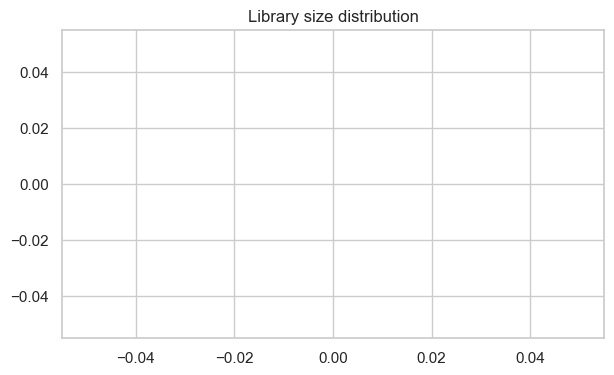

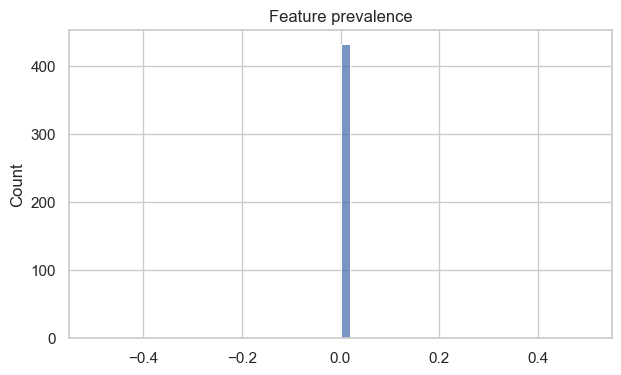

In [151]:
print("Classes:", y.value_counts(), "\n")

print("Missing values:", X_df.isna().sum().sum())

zero_perc = (X_df == 0).sum().sum() / X_df.size
print(f"Total zero fraction: {zero_perc:.3f}")

# Library size per sample
libsize = X_df.sum(axis=1)

print("\nLibrary size summary:")
print(libsize.describe())

plt.figure(figsize=(7,4))
sns.histplot(libsize, bins=30)
plt.title("Library size distribution")
plt.show()

# Feature prevalence
prevalence = (X_df > 0).sum(axis=0)
plt.figure(figsize=(7,4))
sns.histplot(prevalence, bins=50)
plt.title("Feature prevalence")
plt.show()


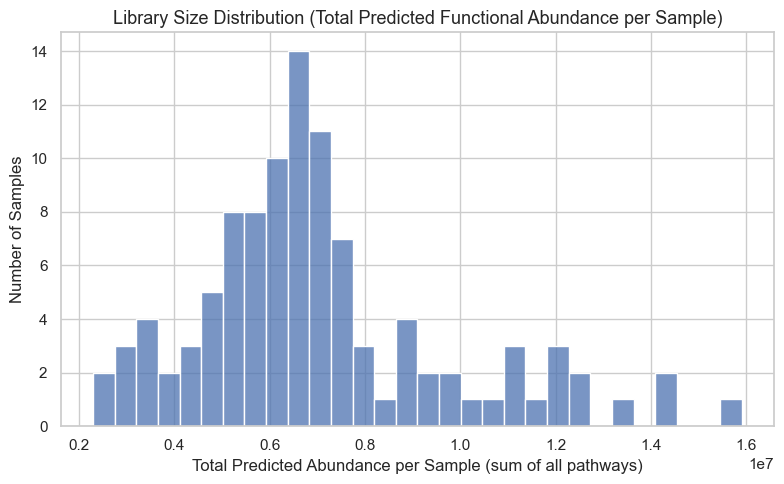

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(libsize, bins=30, kde=False)
plt.title("Library Size Distribution (Total Predicted Functional Abundance per Sample)", fontsize=13)
plt.xlabel("Total Predicted Abundance per Sample (sum of all pathways)", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.tight_layout()
plt.show()


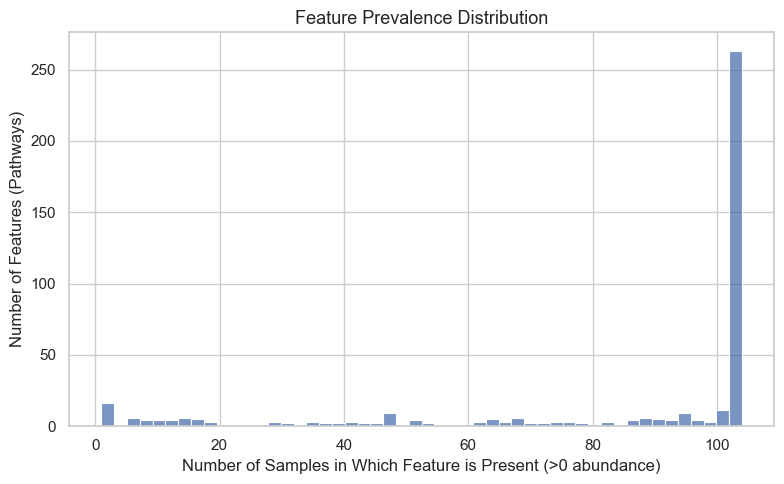

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(prevalence, bins=50, kde=False)
plt.title("Feature Prevalence Distribution", fontsize=13)
plt.xlabel("Number of Samples in Which Feature is Present (>0 abundance)", fontsize=12)
plt.ylabel("Number of Features (Pathways)", fontsize=12)
plt.tight_layout()
plt.show()


In [47]:
# Remove exact duplicate rows
dup_mask = X_df.duplicated()
print("Duplicate samples removed:", dup_mask.sum())
X_clean = X_df[~dup_mask].copy()
y_clean = y[~dup_mask].copy()

# Remove very low-depth samples (bottom 1%)
libsize = X_clean.sum(axis=1)
cutoff = np.percentile(libsize, 1)
keep = libsize >= cutoff
print("Low-depth samples removed:", (~keep).sum())

X_clean = X_clean.loc[keep]
y_clean = y_clean.loc[keep]

# Remove rare features (present in <1% samples)
threshold = max(1, int(0.01 * X_clean.shape[0]))
prev = (X_clean > 0).sum(axis=0)
keep_feat = prev >= threshold
print("Rare features removed:", (~keep_feat).sum())

X_clean = X_clean.loc[:, keep_feat]


Duplicate samples removed: 0
Low-depth samples removed: 2
Rare features removed: 0


In [49]:
X_clean.to_csv("X_clean.csv")
y_clean.to_frame("Group").to_csv("y_clean.csv")

print("Saved cleaned datasets.")


Saved cleaned datasets.


In [51]:
missing_labels = y.isna().sum()
print("Missing label count:", missing_labels)

if missing_labels > 0:
    print("These samples have no label:")
    print(y[y.isna()].index.tolist())
    # You may want to remove them:
    keep_mask = ~y.isna()
    X_df = X_df.loc[keep_mask]
    y = y.loc[keep_mask]
    print("Removed unlabeled samples.")


Missing label count: 0


In [53]:
def dataset_summary(X, y):
    print("Samples:", X.shape[0])
    print("Features:", X.shape[1])
    print("\nClass counts:")
    print(y.value_counts())
    
    print("\nMissing values in X:", X.isna().sum().sum())
    print("\nZero fraction per sample (first 5):")
    print((X == 0).sum(axis=1).head())
    
    print("\nZero fraction per feature (top 10):")
    zero_frac_feat = (X == 0).sum(axis=0) / X.shape[0]
    print(zero_frac_feat.sort_values(ascending=False).head(10))

dataset_summary(X_df, y)


Samples: 104
Features: 431

Class counts:
Group
SIP    27
AIP    27
RP     25
NP     25
Name: count, dtype: int64

Missing values in X: 0

Zero fraction per sample (first 5):
SRR29318373     95
SRR29318374    109
SRR29318375     97
SRR29318376    108
SRR29318377     70
dtype: int64

Zero fraction per feature (top 10):
pathway
PWY-7398    0.990385
PWY-7274    0.990385
PWY-6942    0.990385
PWY-7002    0.990385
PWY-7644    0.990385
PWY-7401    0.990385
PWY-5266    0.990385
PWY-622     0.990385
PWY-5656    0.990385
PWY-5675    0.990385
dtype: float64


Zero fraction: 0.1961003034088881


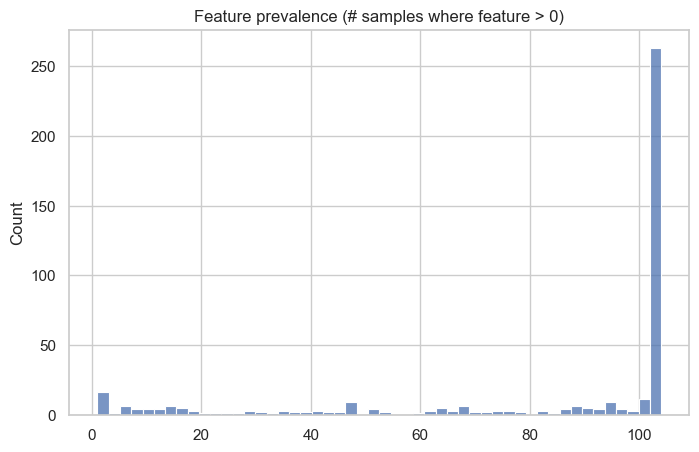

Features in <= 1 samples: 11


In [55]:
total_entries = X_df.size
zero_entries = (X_df == 0).sum().sum()
print("Zero fraction:", zero_entries / total_entries)

feature_prevalence = (X_df > 0).sum()
plt.figure()
sns.histplot(feature_prevalence, bins=50)
plt.title("Feature prevalence (# samples where feature > 0)")
plt.show()

threshold = max(1, int(0.01 * X_df.shape[0]))
rare_feats = (feature_prevalence <= threshold).sum()
print(f"Features in <= {threshold} samples:", rare_feats)


In [57]:
dup_mask = X_df.duplicated(keep=False)
print("Duplicated samples:", dup_mask.sum())
if dup_mask.sum() > 0:
    print(X_df.index[dup_mask].tolist())


Duplicated samples: 0


In [61]:
import skbio.stats.composition as skc

# Convert to numpy array
X_array = X_clean.values.astype(float)

# 1️⃣ Zero-replacement (count zeros as tiny pseudo-count)
X_replaced = skc.multi_replace(X_array)

# 2️⃣ CLR transformation
X_clr = skc.clr(X_replaced)

# Convert back to DataFrame
X_clr_df = pd.DataFrame(X_clr, index=X_clean.index, columns=X_clean.columns)

print("CLR-transformed data shape:", X_clr_df.shape)

# Optional: inspect first few rows
X_clr_df.iloc[:5, :5]


CLR-transformed data shape: (102, 431)


pathway,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY
SRR29318373,3.343356,-6.775493,-3.656983,-0.822284,3.404385
SRR29318374,3.185235,-4.346894,-8.389877,-0.320798,3.247173
SRR29318375,3.535889,-3.656820,-3.656820,-0.081997,3.483280
SRR29318376,3.522793,-6.642941,-3.533321,-2.681462,3.865880
SRR29318378,3.272572,-4.593057,-3.656202,-1.505167,3.593764


In [63]:
# Confirm no zeros remain
print("Any zeros left?", (X_clr_df == 0).any().any())

# Summary stats
print(X_clr_df.describe().round(2))


Any zeros left? False
pathway  1CMET2-PWY  3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  \
count        102.00                                  102.00   
mean           3.56                                   -3.53   
std            0.38                                    1.28   
min            2.10                                   -6.78   
25%            3.33                                   -4.25   
50%            3.55                                   -3.57   
75%            3.76                                   -2.77   
max            4.70                                   -0.47   

pathway  AEROBACTINSYN-PWY  ALL-CHORISMATE-PWY  ANAEROFRUCAT-PWY  \
count               102.00              102.00            102.00   
mean                 -4.16               -0.86              3.83   
std                   1.48                1.19              0.53   
min                  -8.39               -4.26              2.44   
25%                  -3.94               -1.45              3.50   
50

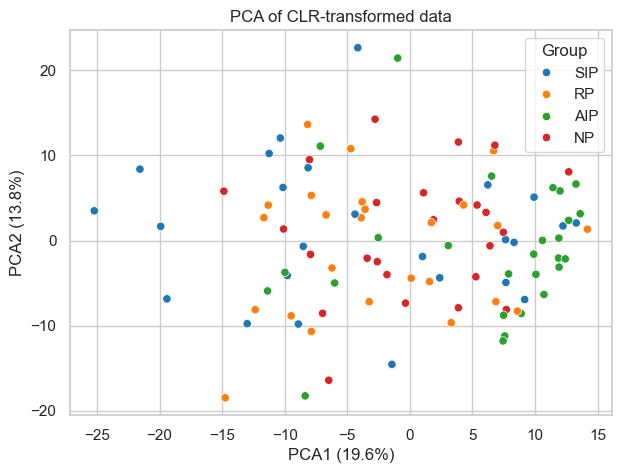

AttributeError: module 'umap' has no attribute 'UMAP'

In [69]:
from sklearn.decomposition import PCA
import umap

# === PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clr_df)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_clean, palette="tab10")
plt.xlabel(f"PCA1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PCA2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA of CLR-transformed data")
plt.legend(title="Group", bbox_to_anchor=(1,1))
plt.show()

# === UMAP ===
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_clr_df)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_clean, palette="tab10")
plt.title("UMAP of CLR-transformed data")
plt.legend(title="Group", bbox_to_anchor=(1,1))
plt.show()


In [67]:
pip install umap

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3586 sha256=473170b2d22f60f107e288e2490217ce3ce5e854f158650814e06a393978a38d
  Stored in directory: c:\users\ccz\appdata\local\pip\cache\wheels\15\f1\28\53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
Note: you may need to restart the kernel to use updated packages.


In [127]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# 1️⃣ Remove near-zero variance features
var_thresh = VarianceThreshold(threshold=0.05)
X_var = var_thresh.fit_transform(X_clr_df)
selected_features_var = X_clr_df.columns[var_thresh.get_support()]
print(f"Kept {len(selected_features_var)} features after variance threshold")

# 2️⃣ ANOVA F-test for top 200 features
k_best = 50
X_best = SelectKBest(score_func=f_classif, k=min(k_best, X_var.shape[1]))
X_best_fit = X_best.fit_transform(X_var, y_clean)
selected_features_f = selected_features_var[X_best.get_support()]
print(f"Top {len(selected_features_f)} features selected by ANOVA F-test")

# 3️⃣ Optional: Random Forest feature importance
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_var, y_clean)
importances = pd.Series(rf.feature_importances_, index=selected_features_var)
top_rf_features = importances.sort_values(ascending=False).head(20)
print("Top 20 features by RF importance:")
print(top_rf_features)


Kept 377 features after variance threshold
Top 50 features selected by ANOVA F-test
Top 20 features by RF importance:
pathway
P161-PWY             0.018641
HISTSYN-PWY          0.014899
P163-PWY             0.012912
ARG+POLYAMINE-SYN    0.011699
PWY-5088             0.011273
PWY-7371             0.010762
PWY-7254             0.009566
PWY-6588             0.009532
P162-PWY             0.008915
GLUTORN-PWY          0.008814
PWY-6263             0.008735
VALDEG-PWY           0.008685
P122-PWY             0.008167
POLYAMSYN-PWY        0.007681
ILEUSYN-PWY          0.007271
PWY-922              0.007185
PWY-6471             0.006714
PWY-5913             0.006578
PWY-6969             0.006132
P23-PWY              0.006003
dtype: float64


In [75]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

# Use selected features from Step 5 (here using X_best_fit)
X_final = X_best_fit
y_final = y_clean.values

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=500, random_state=42),
    "ElasticNet": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000))
    ])
}

# Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro')
    # ROC-AUC can be added if binary classification
}

# Run CV
for name, model in models.items():
    print(f"\n=== {name} ===")
    scores = cross_validate(model, X_final, y_final, cv=cv, scoring=scoring, return_train_score=True)
    for metric in scoring.keys():
        print(f"{metric} - train: {scores['train_'+metric].mean():.3f}, test: {scores['test_'+metric].mean():.3f}")



=== RandomForest ===
accuracy - train: 1.000, test: 0.430
f1_macro - train: 1.000, test: 0.418

=== ElasticNet ===
accuracy - train: 1.000, test: 0.460
f1_macro - train: 1.000, test: 0.460


In [95]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, 
    classification_report, confusion_matrix
)
import numpy as np

# Use X_final = X_best_fit or X_clr_df with selected features
X_final = X_best_fit
y_final = y_clean.values

# Get the metadata values corresponding to the original X_clr_df rows
# Assuming X_clr_df and metadata are aligned by index/sample
cold_pulp_values = metadata.loc[X_clr_df.index, 'Cold pulp test'].values

# Convert cold_pulp_values to numerical if it's categorical
# If it's already numerical, you can use it directly
# If it's categorical, you might want to encode it
if cold_pulp_values.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    cold_pulp_encoded = le.fit_transform(cold_pulp_values)
    print("Encoded 'cold pulp test' column from categorical to numerical")
else:
    cold_pulp_encoded = cold_pulp_values

# Add the cold pulp test column as a new feature to X_final
X_final_with_metadata = np.column_stack([X_final, cold_pulp_encoded])

print(f"X_final shape before adding metadata: {X_final.shape}")
print(f"X_final shape after adding metadata: {X_final_with_metadata.shape}")

# Update X_final to include the new column
X_final = X_final_with_metadata



# Outer CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Inner CV for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and hyperparameters
models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [200, 500], "max_depth": [None, 10, 20]}
    },
    "ElasticNet": {
        "model": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000))
        ]),
        "params": {"clf__C": [0.1, 1, 10], "clf__l1_ratio": [0.3, 0.5, 0.7]}
    },
    "LogisticRegression": {
        "model": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=5000))
        ]),
        "params": {"clf__C": [0.1, 1, 10], "clf__penalty": ["l2"]}
    },
    "SVM": {
        "model": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(probability=True))
        ]),
        "params": {"clf__C": [0.1, 1, 10], "clf__kernel": ["linear", "rbf"]}
    }
}

# Storage for results
results = {}

for name, mp in models_params.items():
    print(f"\n=== {name} ===")
    gs = GridSearchCV(mp["model"], mp["params"], cv=inner_cv, scoring='f1_macro', n_jobs=-1)
    
    outer_scores = {'accuracy': [], 'f1_macro': [], 'precision_macro': [], 'recall_macro': []}
    
    for train_idx, test_idx in outer_cv.split(X_final, y_final):
        X_train, X_test = X_final[train_idx], X_final[test_idx]
        y_train, y_test = y_final[train_idx], y_final[test_idx]
        
        # Fit inner CV
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_
        
        # Predict
        y_pred = best_model.predict(X_test)
        
        # Metrics
        outer_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        outer_scores['f1_macro'].append(f1_score(y_test, y_pred, average='macro'))
        outer_scores['precision_macro'].append(precision_score(y_test, y_pred, average='macro'))
        outer_scores['recall_macro'].append(recall_score(y_test, y_pred, average='macro'))
    
    results[name] = {metric: np.mean(scores) for metric, scores in outer_scores.items()}
    print("Outer CV scores:", results[name])
    
    # Confusion matrix and classification report on the last fold
    print("\nClassification report (last fold):")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix (last fold):")
    print(confusion_matrix(y_test, y_pred))


Encoded 'cold pulp test' column from categorical to numerical
X_final shape before adding metadata: (102, 200)
X_final shape after adding metadata: (102, 201)

=== RandomForest ===
Outer CV scores: {'accuracy': np.float64(0.5666666666666667), 'f1_macro': np.float64(0.5661732711732711), 'precision_macro': np.float64(0.5909523809523809), 'recall_macro': np.float64(0.5666666666666667)}

Classification report (last fold):
              precision    recall  f1-score   support

         AIP       0.50      0.60      0.55         5
          NP       1.00      1.00      1.00         5
          RP       0.67      0.40      0.50         5
         SIP       0.50      0.60      0.55         5

    accuracy                           0.65        20
   macro avg       0.67      0.65      0.65        20
weighted avg       0.67      0.65      0.65        20

Confusion matrix (last fold):
[[3 0 1 1]
 [0 5 0 0]
 [1 0 2 2]
 [2 0 0 3]]

=== ElasticNet ===
Outer CV scores: {'accuracy': np.float64(0.69571

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, SRR29318436 to SRR29318430
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Group                 104 non-null    object
 1   Pulp exposure status  104 non-null    object
 2   Age                   104 non-null    int64 
 3   Sex                   104 non-null    object
 4   Cold pulp test        104 non-null    object
 5   Heat pulp test        104 non-null    object
 6   Spontaneous pain      104 non-null    object
 7   Night pain            104 non-null    object
 8   Percussion pain       104 non-null    object
 9   Electronic pulp test  104 non-null    object
 10  toothsite             104 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.8+ KB
None

Group value counts:
Group
AIP    27
SIP    27
NP     25
RP     25
Name: count, dtype: int64

Shape of X: (104, 3)
Target classes: ['AIP' 'NP' 'RP' 'SIP']
Numer

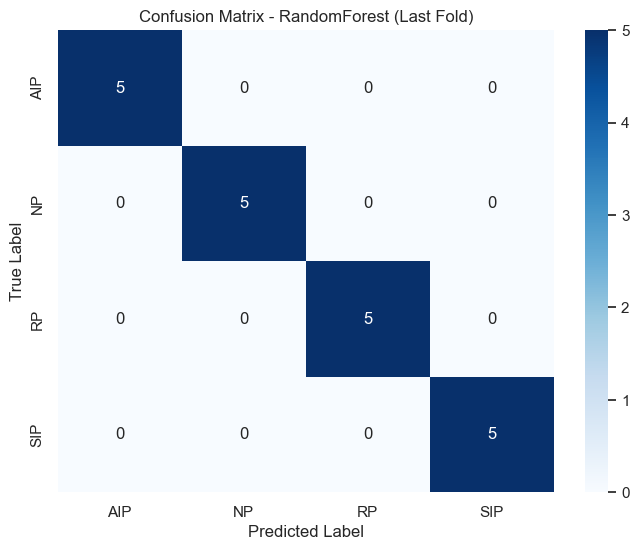


=== LogisticRegression ===

Best parameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Outer CV performance (mean ± std):
  accuracy: 1.000 ± 0.000
  f1_macro: 1.000 ± 0.000
  f1_weighted: 1.000 ± 0.000
  precision_macro: 1.000 ± 0.000
  recall_macro: 1.000 ± 0.000

Classification report (last fold):
              precision    recall  f1-score   support

         AIP       1.00      1.00      1.00         5
          NP       1.00      1.00      1.00         5
          RP       1.00      1.00      1.00         5
         SIP       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



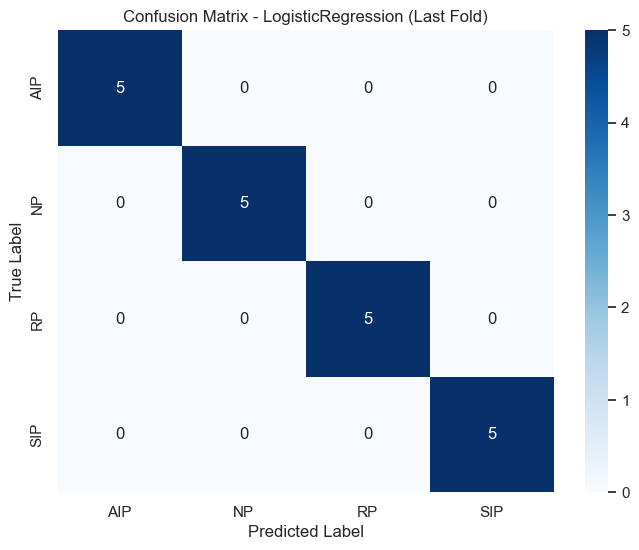


=== SVM ===

Best parameters: {'clf__C': 0.1, 'clf__kernel': 'linear'}
Outer CV performance (mean ± std):
  accuracy: 1.000 ± 0.000
  f1_macro: 1.000 ± 0.000
  f1_weighted: 1.000 ± 0.000
  precision_macro: 1.000 ± 0.000
  recall_macro: 1.000 ± 0.000

Classification report (last fold):
              precision    recall  f1-score   support

         AIP       1.00      1.00      1.00         5
          NP       1.00      1.00      1.00         5
          RP       1.00      1.00      1.00         5
         SIP       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



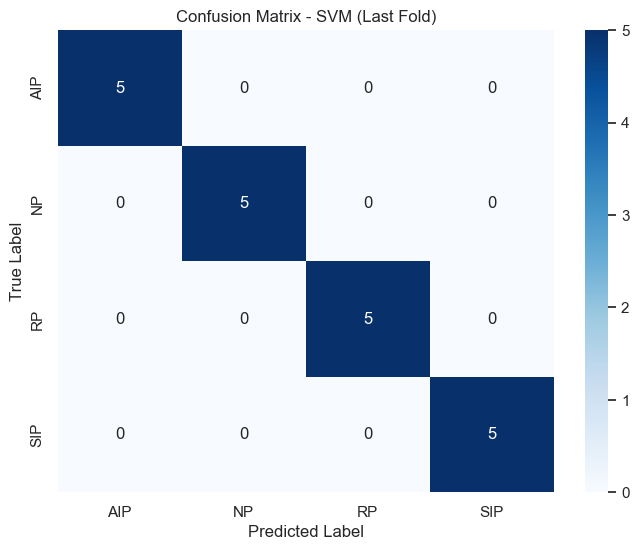


=== GradientBoosting ===

Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100}
Outer CV performance (mean ± std):
  accuracy: 1.000 ± 0.000
  f1_macro: 1.000 ± 0.000
  f1_weighted: 1.000 ± 0.000
  precision_macro: 1.000 ± 0.000
  recall_macro: 1.000 ± 0.000

Classification report (last fold):
              precision    recall  f1-score   support

         AIP       1.00      1.00      1.00         5
          NP       1.00      1.00      1.00         5
          RP       1.00      1.00      1.00         5
         SIP       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



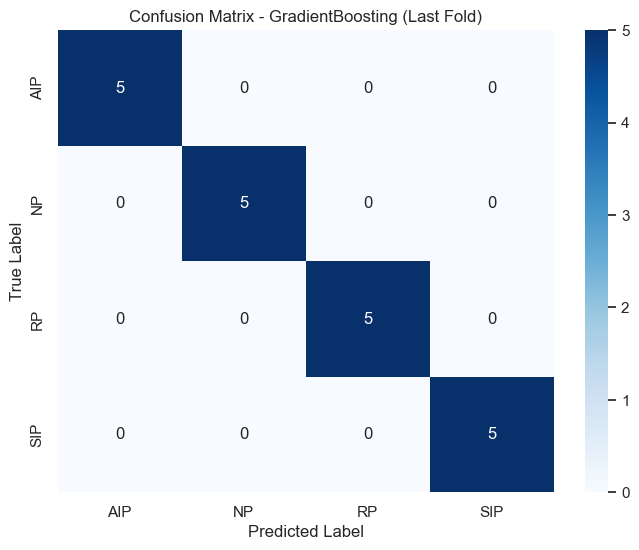


FINAL MODEL COMPARISON
                    accuracy  f1_macro  f1_weighted  precision_macro  \
RandomForest             1.0       1.0          1.0              1.0   
LogisticRegression       1.0       1.0          1.0              1.0   
SVM                      1.0       1.0          1.0              1.0   
GradientBoosting         1.0       1.0          1.0              1.0   

                    recall_macro  
RandomForest                 1.0  
LogisticRegression           1.0  
SVM                          1.0  
GradientBoosting             1.0  


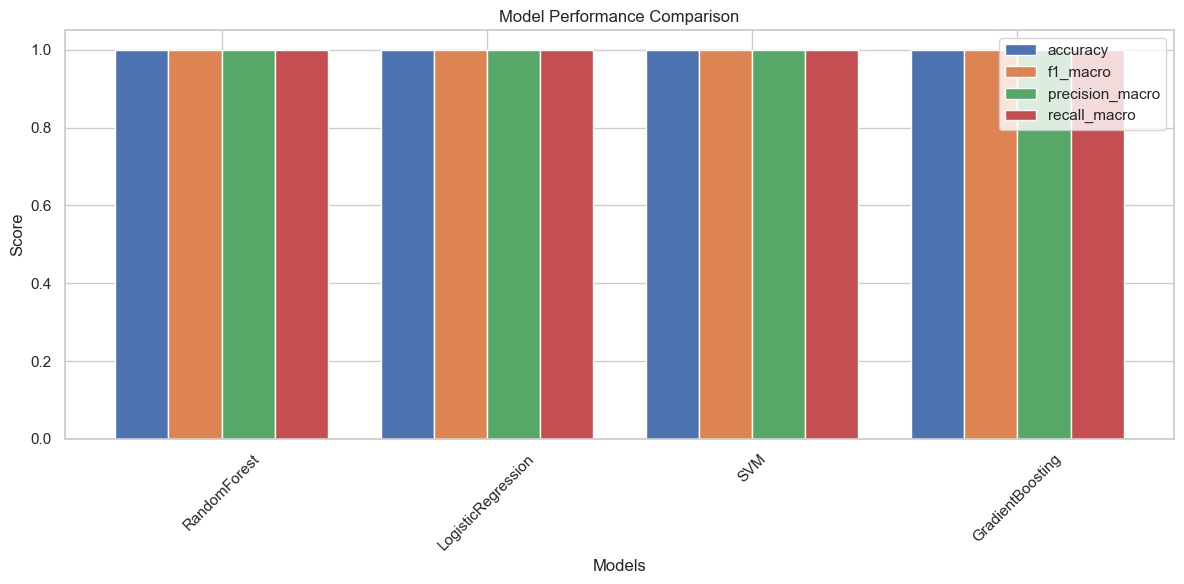


Best model: RandomForest
Best F1 Macro Score: 1.000


ValueError: input_features is not equal to feature_names_in_

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your metadata dataframe is called 'metadata'
# Let's first explore the data
print("Metadata Info:")
print(metadata.info())
print("\nGroup value counts:")
print(metadata['Group'].value_counts())

# Prepare features and target
# Select only numeric columns for features, or encode categorical ones
X_metadata = metadata.drop(['Group', "Age", "Sex", "toothsite", "Night pain", "Percussion pain", "Electronic pulp test", "Heat pulp test"],  axis=1)  # Features
y_group = metadata['Group']  # Target

print(f"\nShape of X: {X_metadata.shape}")
print(f"Target classes: {y_group.unique()}")

# Identify numeric and categorical columns
numeric_cols = X_metadata.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_metadata.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Preprocessing: Handle categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_group)

print(f"Encoded target classes: {label_encoder.classes_}")

# Outer CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Inner CV for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and hyperparameters
models_params = {
    "RandomForest": {
        "model": Pipeline([
            ('preprocessor', preprocessor),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        "params": {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5]
        }
    },
    "LogisticRegression": {
        "model": Pipeline([
            ('preprocessor', preprocessor),
            ('clf', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        "params": {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l2']
        }
    },
    "SVM": {
        "model": Pipeline([
            ('preprocessor', preprocessor),
            ('clf', SVC(probability=True, random_state=42))
        ]),
        "params": {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    "GradientBoosting": {
        "model": Pipeline([
            ('preprocessor', preprocessor),
            ('clf', GradientBoostingClassifier(random_state=42))
        ]),
        "params": {
            'clf__n_estimators': [100, 200],
            'clf__learning_rate': [0.1, 0.05],
            'clf__max_depth': [3, 5]
        }
    }
}

# Storage for results
results = {}
best_models = {}

for name, mp in models_params.items():
    print(f"\n{'='*50}")
    print(f"=== {name} ===")
    print(f"{'='*50}")
    
    gs = GridSearchCV(mp["model"], mp["params"], cv=inner_cv, scoring='f1_macro', n_jobs=-1)
    
    outer_scores = {
        'accuracy': [], 
        'f1_macro': [], 
        'f1_weighted': [],
        'precision_macro': [], 
        'recall_macro': []
    }
    
    fold = 0
    for train_idx, test_idx in outer_cv.split(X_metadata, y_encoded):
        fold += 1
        X_train, X_test = X_metadata.iloc[train_idx], X_metadata.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
        
        # Fit inner CV
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_
        
        # Predict
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)
        
        # Metrics
        outer_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        outer_scores['f1_macro'].append(f1_score(y_test, y_pred, average='macro'))
        outer_scores['f1_weighted'].append(f1_score(y_test, y_pred, average='weighted'))
        outer_scores['precision_macro'].append(precision_score(y_test, y_pred, average='macro'))
        outer_scores['recall_macro'].append(recall_score(y_test, y_pred, average='macro'))
        
        # Store the best model from the last fold
        if fold == outer_cv.get_n_splits():
            best_models[name] = best_model
    
    # Calculate mean scores
    results[name] = {metric: (np.mean(scores), np.std(scores)) for metric, scores in outer_scores.items()}
    
    print(f"\nBest parameters: {gs.best_params_}")
    print("Outer CV performance (mean ± std):")
    for metric, (mean_score, std_score) in results[name].items():
        print(f"  {metric}: {mean_score:.3f} ± {std_score:.3f}")
    
    # Confusion matrix and classification report on the last fold
    print("\nClassification report (last fold):")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Plot confusion matrix for the last fold
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name} (Last Fold)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Compare all models
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")

comparison_df = pd.DataFrame({
    model: {metric: scores[0] for metric, scores in results[model].items()} 
    for model in results.keys()
}).T

comparison_df = comparison_df.sort_values('f1_macro', ascending=False)
print(comparison_df.round(3))

# Plot model comparison
plt.figure(figsize=(12, 6))
metrics_to_plot = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
x_pos = np.arange(len(comparison_df.index))

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x_pos + i*0.2, comparison_df[metric], width=0.2, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x_pos + 0.3, comparison_df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Get the best model
best_model_name = comparison_df.index[0]
best_model = best_models[best_model_name]
print(f"\nBest model: {best_model_name}")
print(f"Best F1 Macro Score: {comparison_df.loc[best_model_name, 'f1_macro']:.3f}")

# Feature importance for tree-based models
if hasattr(best_model.named_steps['clf'], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = []
    
    # Numeric features
    feature_names.extend(numeric_cols)
    
    # Categorical features (from one-hot encoding)
    if categorical_cols:
        ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
        for i, col in enumerate(categorical_cols):
            if hasattr(ohe, 'get_feature_names_out'):
                cat_features = ohe.get_feature_names_out([col])
                feature_names.extend(cat_features)
            else:
                # For older sklearn versions
                for j in range(len(ohe.categories_[i]) - 1):  # -1 because of drop='first'
                    feature_names.append(f"{col}_{j}")
    
    importances = best_model.named_steps['clf'].feature_importances_
    feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_imp_df = feature_imp_df.sort_values('importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_imp_df, x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Imports & paths

In [9]:
# Cell 1: imports and path
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score


# Load features and map labels by sample id (index in features matches metadata.sample)

In [11]:
# Cell 2: 
feature_table_path = r"C:\Users\ccz\Desktop\Galaxy2235-[PICRUSt2 Full pipeline on data 2226 and data 2231_ Pathway abundances].tabular2.txt"

# read as tab-separated; rows are samples
X_raw = pd.read_csv(feature_table_path, sep="\t", index_col=0).T
# Ensure metadata DataFrame exists in namespace and has sample & Group
assert 'metadata' in globals(), "metadata dataframe not found in environment"
assert {'sample','Group'}.issubset(metadata.columns), "metadata must contain 'sample' and 'Group'"

# Reindex metadata by sample id and map groups to feature table order
meta_idx = metadata.set_index('sample')
y_raw = meta_idx.loc[X_raw.index, 'Group']  # align by sample ids (index of X_raw)

# encode labels as integers
le = LabelEncoder()
y = le.fit_transform(y_raw.values)  # numpy array aligned with X_raw.index
print("Classes:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Feature table shape:", X_raw.shape)


Classes: {'AIP': 0, 'NP': 1, 'RP': 2, 'SIP': 3}
Feature table shape: (104, 431)


# 0-replacement (pseudo-count) and CLR transform (minimal robust)

In [13]:
# Cell 3: zero replacement + CLR transform (use scikit-bio if available, else tiny pseudo-count)
try:
    import skbio.stats.composition as skc
    X_arr = X_raw.values.astype(float)
    X_repl = skc.multi_replace(X_arr, delta=1e-6)
    X_clr = skc.clr(X_repl)
except Exception:
    # fallback: add tiny pseudo-count per sample and apply clr manually
    X_arr = X_raw.values.astype(float)
    X_repl = X_arr.copy()
    X_repl[X_repl == 0] = 1e-6
    # compute clr: log(x) - mean(log(x))
    logX = np.log(X_repl)
    X_clr = logX - logX.mean(axis=1, keepdims=True)

X_clr_df = pd.DataFrame(X_clr, index=X_raw.index, columns=X_raw.columns)
print("CLR shape:", X_clr_df.shape)


CLR shape: (104, 431)


In [15]:
X_clr_df

,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY,ANAGLYCOLYSIS-PWY,ARG+POLYAMINE-SYN,ARGDEG-PWY,ARGORNPROST-PWY,ARGSYN-PWY,...,THISYN-PWY,THREOCAT-PWY,THRESYN-PWY,TRNA-CHARGING-PWY,TRPSYN-PWY,TYRFUMCAT-PWY,UBISYN-PWY,UDPNAGSYN-PWY,VALDEG-PWY,VALSYN-PWY
SRR29318373,3.714475,-6.404374,-4.969574,-0.451165,3.775505,3.887649,2.538280,-4.969574,2.245570,3.281166,...,3.027739,-4.969574,3.818395,3.879247,3.529027,-1.063286,2.375297,3.707507,-5.141056,3.743841
SRR29318374,3.611062,-3.921068,-7.964050,0.105028,3.673000,3.841113,2.389074,-5.546286,2.484117,3.483500,...,3.305400,-5.067064,3.946321,3.865089,3.514465,0.125310,1.341709,3.634105,-4.098784,3.823379
SRR29318375,3.914823,-4.961605,-4.961605,0.296938,3.862214,4.086824,2.131890,-4.961605,2.447137,3.266568,...,3.608039,-4.251388,3.869409,4.044962,3.634812,-2.097684,2.123962,3.558747,-5.416008,3.693367
SRR29318376,3.944711,-6.221022,-4.795170,-2.259543,4.287798,4.248774,2.105234,-4.795170,0.830971,3.627175,...,3.125960,-3.988360,4.103089,4.178812,3.682873,-3.176647,0.761476,4.009245,-4.795170,3.947519
SRR29318377,3.006934,-1.467018,-5.228950,0.497469,3.917505,4.125953,1.170509,-2.256516,1.525071,4.030636,...,1.525436,-0.778082,4.087131,4.057383,1.807773,-0.848685,0.383430,4.262305,-1.929132,2.063166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR29318472,4.257230,-4.929284,-7.132584,-3.908335,4.400519,4.461813,2.767486,-4.649917,0.203817,3.484670,...,3.573045,-5.267989,4.366268,4.444420,3.654156,-3.251088,-1.438288,3.975864,-4.649917,3.862238
SRR29318473,3.627792,-3.305450,-5.139784,0.347230,3.803154,3.873393,2.007574,-3.864863,1.723899,3.576212,...,2.864191,-4.394850,3.741970,3.768944,3.359058,-1.519189,0.708206,3.609925,-2.601667,3.804132
SRR29318474,4.408837,-5.446849,-6.444320,-0.948538,4.842178,4.909236,2.899562,-5.269561,3.479987,4.462229,...,4.032182,-4.305537,4.904882,4.812302,4.495576,-3.061151,-1.916699,4.366955,-4.331726,4.837575
SRR29318475,3.895636,-2.571384,-4.863821,-0.966201,4.206677,4.249910,2.822336,-4.863821,3.044455,3.890643,...,3.445842,-3.150784,4.221898,4.148866,3.774944,-1.780020,-0.627254,3.971559,-2.633589,4.186482


# Variance threshold + ANOVA SelectKBest (k) and RF top-N (two alternative feature sets)

In [17]:
# Cell 4: feature filtering and two selection strategies
var_thresh_val = 0.05
k_best = 50
rf_top_n = 50

# 1) variance threshold
vt = VarianceThreshold(threshold=var_thresh_val)
X_var = vt.fit_transform(X_clr_df)
features_after_var = X_clr_df.columns[vt.get_support()]
print("Kept after variance threshold:", len(features_after_var))

# 2) ANOVA SelectKBest (on variance-filtered matrix)
skb = SelectKBest(score_func=f_classif, k=min(k_best, X_var.shape[1]))
X_anova = skb.fit_transform(X_var, y)
anova_mask = skb.get_support()
anova_features = features_after_var[anova_mask]
X_anova_df = pd.DataFrame(X_anova, index=X_clr_df.index, columns=anova_features)
print("ANOVA selected features:", len(anova_features))

# 3) RF top-n (train RF on variance-filtered data)
from sklearn.ensemble import RandomForestClassifier
rf_for_sel = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_for_sel.fit(X_var, y)
importances = pd.Series(rf_for_sel.feature_importances_, index=features_after_var)
rf_top_features = importances.sort_values(ascending=False).head(rf_top_n).index
X_rf_df = X_clr_df[rf_top_features].copy()
print("RF top features:", len(rf_top_features))


Kept after variance threshold: 431
ANOVA selected features: 50
RF top features: 50


# Does NOT work: Optional: UMAP embedding

In [1]:
pip install pumap


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pumap (from versions: none)
ERROR: No matching distribution found for pumap


In [ ]:
# Cell 5: UMAP for visualization or to use as features (2D embedding)
try:
    from umap import UMAP
    umap = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_umap = umap.fit_transform(X_anova_df.values)   # using ANOVA-selected features for embedding
    X_umap_df = pd.DataFrame(X_umap, index=X_anova_df.index, columns=['UMAP1','UMAP2'])
    print("UMAP produced shape:", X_umap_df.shape)
except Exception as e:
    print("UMAP not installed or failed:", e)
    X_umap_df = None


# Autoencoder for nonlinear feature extraction

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert ANOVA features to tensor
X_tensor = torch.tensor(X_anova_df.values, dtype=torch.float32)

# Define autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

input_dim = X_anova_df.shape[1]
latent_dim = 10  # number of features for ML
autoencoder = Autoencoder(input_dim, latent_dim)


ImportError: DLL load failed while importing _C: The operating system cannot run %1.

In [11]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   -- ------------------------------------- 7.6/110.9 MB 36.2 MB/s eta 0:00:03
   ----- ---------------------------------- 16.0/110.9 MB 38.7 MB/s eta 0:00:03
   --------- ------------------------------ 25.7/110.9 MB 41.8 MB/s eta 0:00:03
   ------------ --------------------------- 35.4/110.9 MB 43.3 MB/s eta 0:00:02
   ---------------- ----------------------- 45.1/110.9 MB 44.2 MB/s eta 0:00:02
   ------------------- -------------------- 54.8/110.9 MB 44.8 MB/s eta 0:00:02
   ----------------------- ---------------- 64.5/110.9 MB 45.2 MB/s eta 0:00:02
   -------------------------- ------------- 74.2/110.9 MB 45.5 MB/s eta 0:00:01
   ------------------------------ --------- 84.4/110.9 MB 45.7 MB/s eta 0:00:01
   --------------------------------- ------ 94.1/110.9 MB 46.2 MB/s eta 0:00:01
   ------------------------------------ -- 103.8/110

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Nested CV function + model definitions (concise, supports XGBoost/LightGBM if installed)

In [ ]:
# Cell 6: nested CV runner (outer=10, inner=3) and model grid definitions
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# helper to get probabilities or decision outputs for ROC AUC
def get_proba_or_decision(est, X):
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X)
    if hasattr(est, "decision_function"):
        df = est.decision_function(X)
        if df.ndim == 1:
            df = np.vstack([-df, df]).T
        exp = np.exp(df - np.max(df, axis=1, keepdims=True))
        return exp / exp.sum(axis=1, keepdims=True)
    return None

# base model grids
models_grids = {
    'RandomForest': (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {'n_estimators': [200, 500], 'max_depth': [None, 10, 20]}
    ),
    'SVM_RBF': (
        Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, random_state=42))]),
        {'clf__C': [0.1,1,10], 'clf__kernel': ['rbf'], 'clf__gamma': ['scale', 0.1, 0.01]}
    ),
    'LogReg': (
        Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=5000, random_state=42))]),
        {'clf__C': [0.1, 1, 10]}
    )
}

# try add XGBoost and LightGBM if available
try:
    from xgboost import XGBClassifier
    models_grids['XGBoost'] = (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
                               {'n_estimators':[200,400], 'max_depth':[3,5], 'learning_rate':[0.01,0.1]})
except Exception:
    pass

try:
    from lightgbm import LGBMClassifier
    models_grids['LightGBM'] = (LGBMClassifier(random_state=42), 
                                {'n_estimators':[200,400], 'learning_rate':[0.01,0.1], 'num_leaves':[20,40]})
except Exception:
    pass

# nested CV runner (returns aggregated metrics)
def nested_cv_evaluate(X, y, models_grids):
    results = {}
    classes = np.unique(y)
    y_bin_template = lambda y_arr: label_binarize(y_arr, classes=classes)
    for name, (estimator, param_grid) in models_grids.items():
        outer_metrics = {'accuracy': [], 'f1_macro': [], 'precision_macro': [], 'recall_macro': [], 'roc_auc_macro': [], 'kappa': []}
        last_report = None
        gsearch = GridSearchCV(estimator, param_grid, cv=inner_cv, scoring='f1_macro', n_jobs=-1)
        for tr_idx, te_idx in outer_cv.split(X, y):
            X_tr, X_te = X[tr_idx], X[te_idx]
            y_tr, y_te = y[tr_idx], y[te_idx]
            gsearch.fit(X_tr, y_tr)
            best = gsearch.best_estimator_
            y_pred = best.predict(X_te)
            proba = get_proba_or_decision(best, X_te)
            # roc_auc: if proba available compute ovo macro
            try:
                if proba is not None:
                    y_te_bin = y_bin_template(y_te)
                    roc = roc_auc_score(y_te_bin, proba, average='macro', multi_class='ovo')
                else:
                    roc = np.nan
            except Exception:
                roc = np.nan
            outer_metrics['accuracy'].append(accuracy_score(y_te, y_pred))
            outer_metrics['f1_macro'].append(f1_score(y_te, y_pred, average='macro'))
            outer_metrics['precision_macro'].append(precision_score(y_te, y_pred, average='macro', zero_division=0))
            outer_metrics['recall_macro'].append(recall_score(y_te, y_pred, average='macro', zero_division=0))
            outer_metrics['roc_auc_macro'].append(roc)
            outer_metrics['kappa'].append(cohen_kappa_score(y_te, y_pred))
            last_report = (y_te, y_pred, best)
        # aggregate means (roc may contain nan)
        import numpy as _np
        agg = {m: (_np.nanmean(v) if m=='roc_auc_macro' else np.mean(v)) for m,v in outer_metrics.items()}
        results[name] = {'metrics': agg, 'last_fold': last_report}
    return results


# Run experiments for the three feature sets and (optionally) UMAP features

In [ ]:
# Cell 7: run nested CV on selected feature matrices and compare
# X_anova_df, X_rf_df, and optionally X_umap_df (if created)
experiments = {
    'ANOVA': X_anova_df.values,
    'RF_top': X_rf_df.values
}
if 'X_umap_df' in globals() and X_umap_df is not None:
    experiments['UMAP_2D'] = X_umap_df.values

all_results = {}
for name, Xmat in experiments.items():
    print("\n=== Running experiments on:", name, "shape:", Xmat.shape)
    res = nested_cv_evaluate(Xmat, y, models_grids)
    # save aggregates
    summary = {model: r['metrics'] for model, r in res.items()}
    all_results[name] = summary

# Display a concise comparison table: rows = feature set + model, columns = metrics
rows = []
for feat_set, model_dict in all_results.items():
    for model_name, info in model_dict.items():
        row = {'feature_set': feat_set, 'model': model_name}
        row.update(info)
        # flatten metrics dict
        row_flat = {'feature_set': feat_set, 'model': model_name}
        row_flat.update(info['metrics'])
        rows.append(row_flat)
comp_df = pd.DataFrame(rows).set_index(['feature_set','model'])
display(comp_df)


# 

In [ ]:
# Cell 8: show confusion matrix & class report for the best performing combination (pick manually from comp_df)
print(comp_df.sort_values(('f1_macro',), ascending=False).head())

# Example: inspect last-fold outputs for ANOVA XGBoost if exists
feat = 'ANOVA'
model = 'XGBoost' if 'XGBoost' in all_results.get(feat, {}) else list(all_results[feat].keys())[0]
y_te, y_pred, best_est = all_results[feat][model]['last_fold']
print("Model inspected:", model, "on feature set:", feat)
print(classification_report(y_te, y_pred, zero_division=0, target_names=le.classes_))
print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))
